In [40]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from pandas.plotting import table

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Линейная регрессия

In [3]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,1.370497,9.093148
1,0.547907,6.432561
2,0.941368,7.665757
3,0.872496,6.200356
4,0.717460,6.203034


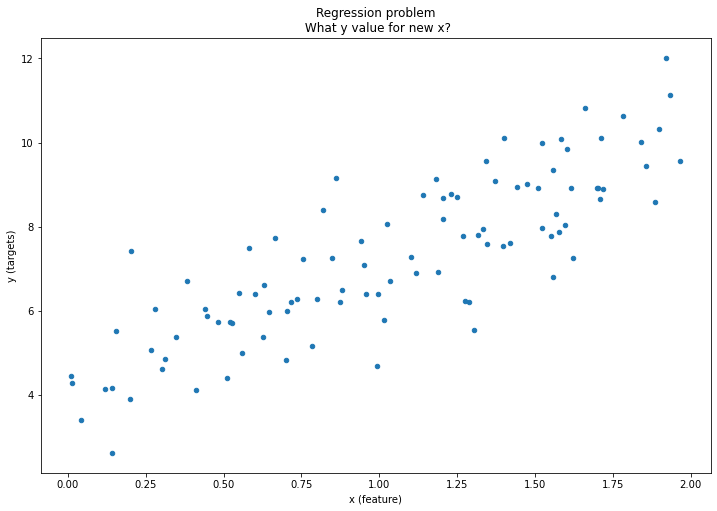

In [4]:
df.plot.scatter('x', 'y')
plt.title('Regression problem\n What y value for new x?')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)');

# Парная регрессия

## Описание данных

$$ y = \beta _{0} + \beta _{1}x + \epsilon $$

## Предсказание данных

$$ \hat{y} = \hat{\beta} _{0} + \hat{\beta} _{1}x + \epsilon $$

#### Построим случайную прямую. Насколько хорошо она описывает данные? ####

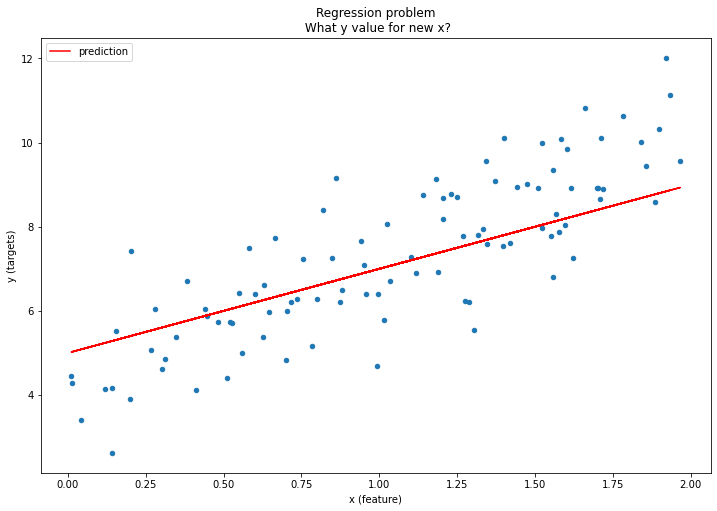

In [5]:
def predict(x):
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title('Regression problem\n What y value for new x?')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)')
plt.plot(x, predict(x), color='red', label='prediction')
plt.legend()
plt.savefig('pics/regression_random_line.pdf')

# RSS

### Residual Sum of Squares

Метод наименьших квадратов

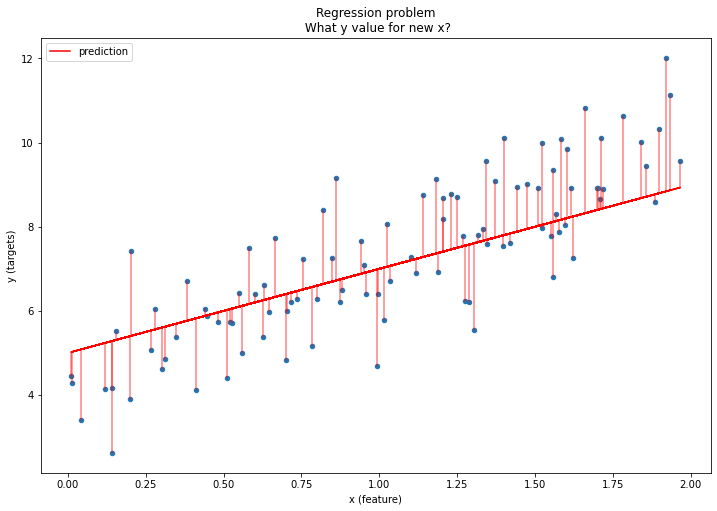

In [6]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title('Regression problem\n What y value for new x?')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)')
plt.plot(x, predict(x), color='red', label='prediction')
plt.legend()

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color='red', alpha=0.5)

In [7]:
rss = ((y - y_pred) ** 2).sum()
print(rss)
print(mean_squared_error(y, y_pred) * y.size)

141.31161719657447
141.31161719657447


In [8]:
mean_squared_error(y, y_pred) * y.size

141.31161719657447

## Минимизация - $ \beta_{0} $

In [9]:
def estimate(x, y):
    y_av = y.mean()
    x_av = x.mean()
    
    b1 = ((x - x_av) * (y - y_av)).sum() / ((x - x_av) ** 2).sum()
    b0 = y_av - b1 * x_av
    
    return b0, b1

def predict_estimated(x, b0, b1):
    return b0 + x * b1
    

In [10]:
b0, b1 = estimate(x, y)
b0, b1

(4.16671965905211, 2.9918427777941794)

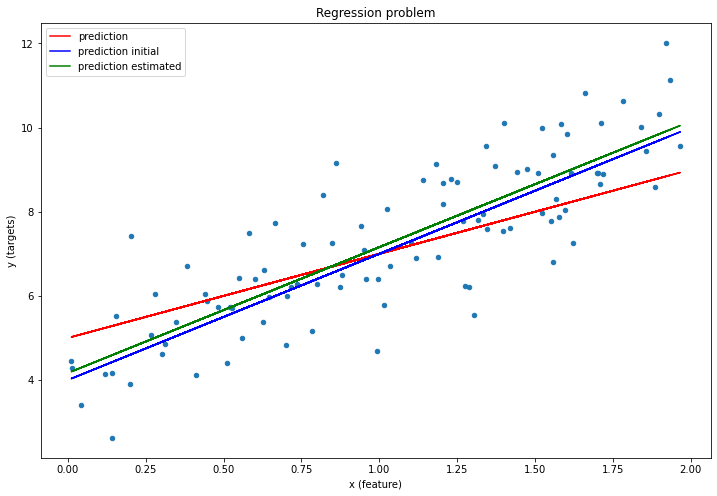

In [11]:
df.plot.scatter('x', 'y')
plt.title('Regression problem')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)')
plt.plot(x, predict(x), color='red', label='prediction')
plt.plot(x, predict_estimated(x, 4, 3), color='blue', label='prediction initial')
plt.plot(x, predict_estimated(x, b0, b1), color='green', label='prediction estimated')
plt.legend()
plt.savefig('pics/regression_estimated.pdf')

In [12]:
print(f'estimated values: b0 = {b0}, b1 = {b1}')
print(f'initial values: b0 = 4, b1 = 3')

estimated values: b0 = 4.16671965905211, b1 = 2.9918427777941794
initial values: b0 = 4, b1 = 3


In [13]:
x_dummy = np.hstack([x, np.ones(x.shape[0]).reshape(-1, 1)])
m, c = np.linalg.lstsq(x_dummy, y)[0]
print(m, c)

[2.99184278] [4.16671966]


# Множественная регрессия

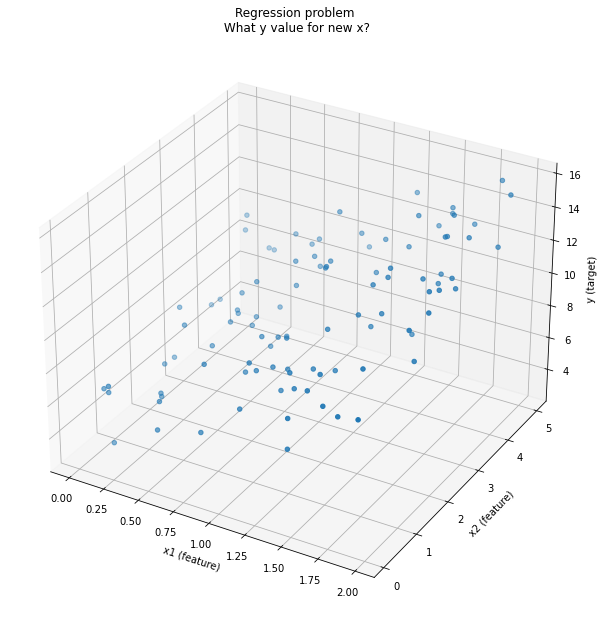

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]
fig = plt.figure()
ax = Axes3D(fig)

x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)

# y = 4 + 3*x_1 + 1*x_2
y = 4 + 3 * x1 + x2 + np.random.randn(100, 1)

ax.scatter(x1, x2, y, marker='o')
ax.set_title('Regression problem\n What y value for new x?')
ax.set_xlabel('x1 (feature)')
ax.set_ylabel('x2 (feature)')
ax.set_zlabel('y (target)')
plt.show()

# Матричная форма

In [15]:
x = np.hstack([np.ones(x1.shape[0]).reshape(-1, 1), x1, x2])

w = la.inv(x.T.dot(x)).dot(x.T).dot(y)
print(w)

[[3.57348718]
 [3.35041497]
 [1.03726212]]


In [16]:
def predict_estimated(x, w):
    return x.dot(w)

def plane(x1, x2):
    return 4 + x1 * 3 + x2

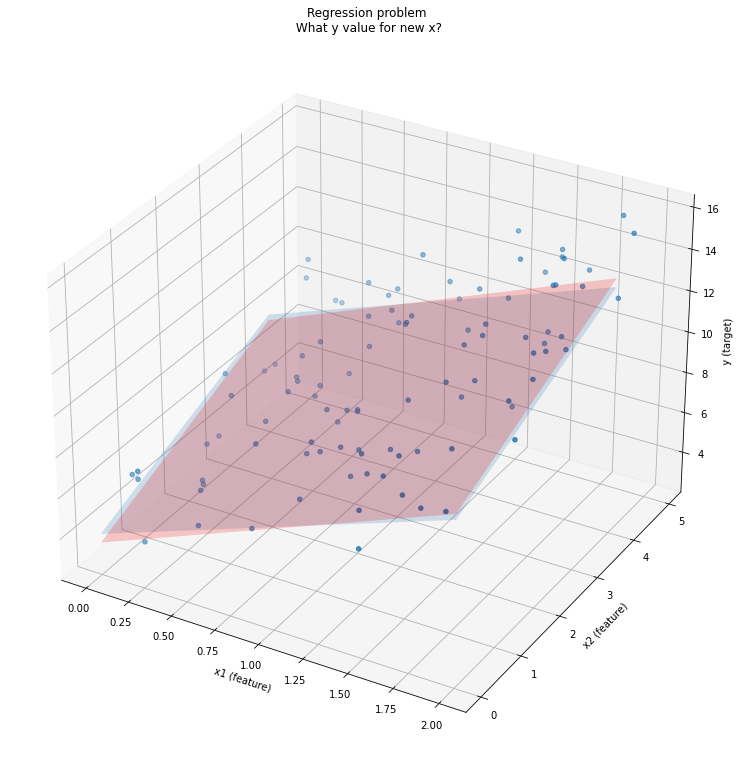

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = Axes3D(fig)

x1_surfs = np.arange(0, 2.5, 0.5)
x2_surfs = np.arange(0, 5.0, 1)
x1_surf, x2_surf = np.meshgrid(x1_surfs, x2_surfs)

zs = np.array([plane(x_i, y_i) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z = zs.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z, alpha=0.2)

zs_pred = np.array([predict_estimated(np.array([[1, x_i, y_i]]), w) for x_i, y_i in zip(np.ravel(x1_surf), np.ravel(x2_surf))])
z_predicted = zs_pred.reshape(x1_surf.shape)
ax.plot_surface(x1_surf, x2_surf, z_predicted, alpha=0.2, color='red')
ax.scatter(x1, x2, y, marker='o')

ax.set_title('Regression problem\n What y value for new x?')
ax.set_xlabel('x1 (feature)')
ax.set_ylabel('x2 (feature)')
ax.set_zlabel('y (target)')
plt.savefig('pics/regression_3D_estimated.pdf')

plt.show()

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(np.hstack([x1, x2]), y)
print(f'Intercept {lin_reg.intercept_[0]:.4f} \nSlopes{lin_reg.coef_[0]}\n')
y_pred = lin_reg.predict(np.hstack([x1, x2]))
print(f'Predictions\n', np.hstack([y_pred, y])[:10])
print(f'\n MSE: {mean_squared_error(y_pred, y):.4f}')

Intercept 3.5735 
Slopes[3.35041497 1.03726212]

Predictions
 [[ 9.71375552  9.49226814]
 [13.03502122 11.93443851]
 [ 4.39908316  6.88681822]
 [13.46919769 14.58331528]
 [ 9.19354717  7.39185429]
 [ 5.80454483  5.25256632]
 [ 8.69628204  7.45822209]
 [ 7.59306124  7.02933338]
 [14.90961342 15.66734517]
 [ 6.56391075  7.89194049]]

 MSE: 1.0328


# Полиномиальная регрессия

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

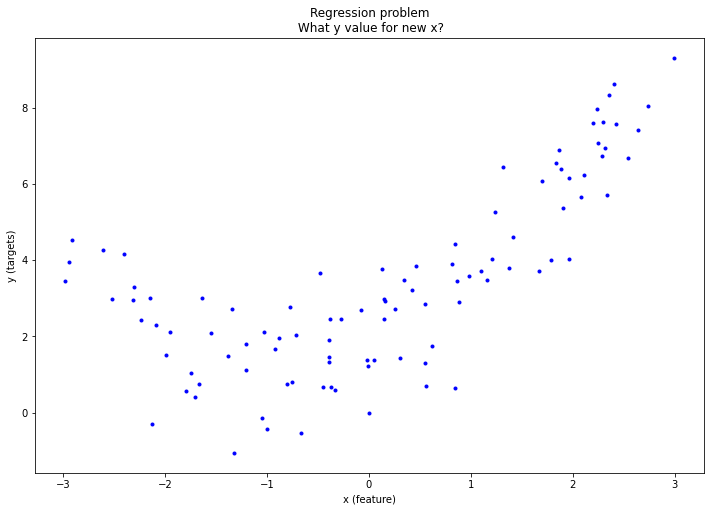

In [20]:
plt.plot(X, y, 'b.')
plt.title('Regression problem\n What y value for new x?')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)')
plt.savefig('pics/regression_poly.pdf')

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([-2.94641003])

In [23]:
X_poly[0]

array([-2.94641003,  8.68133206])

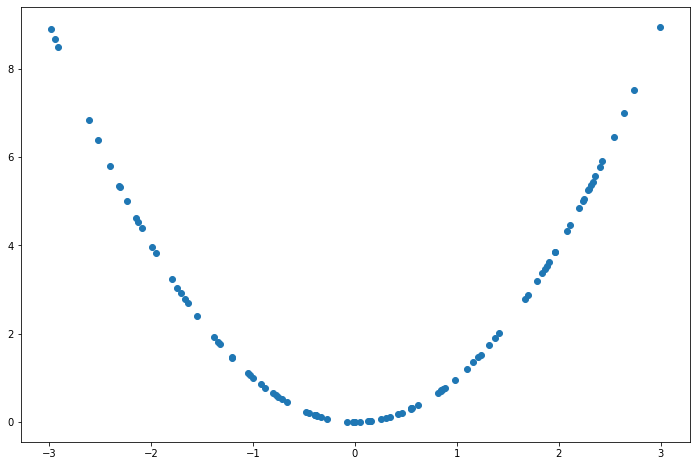

In [24]:
plt.scatter(X_poly[:, 0], X_poly[:, 1]);

$$ y = \theta _{0} + \theta _{1}x _{1} + \theta _{2}x _{1}^2 $$

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.84713446]), array([[0.9941488 , 0.55319752]]))

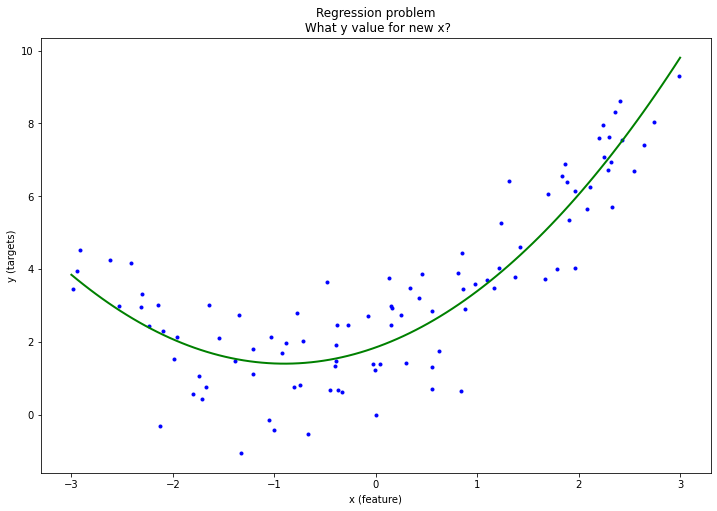

In [26]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'g-', linewidth=2, label='Predictions')
plt.title('Regression problem\n What y value for new x?')
plt.xlabel('x (feature)')
plt.ylabel('y (targets)');

# Проблема переобучения

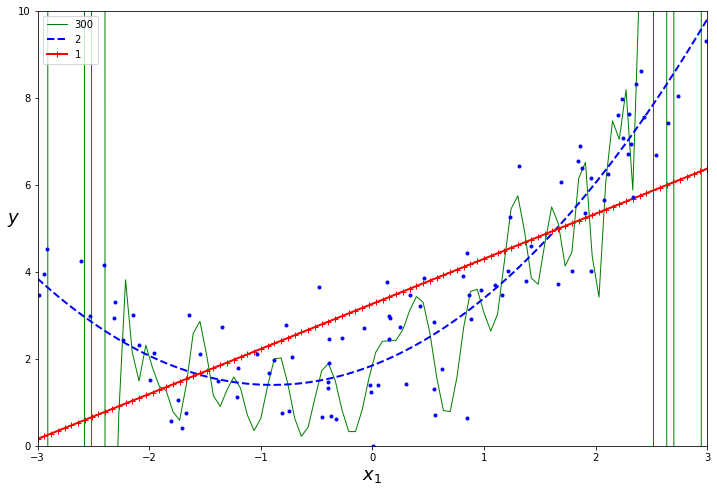

In [27]:
for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Регуляризация

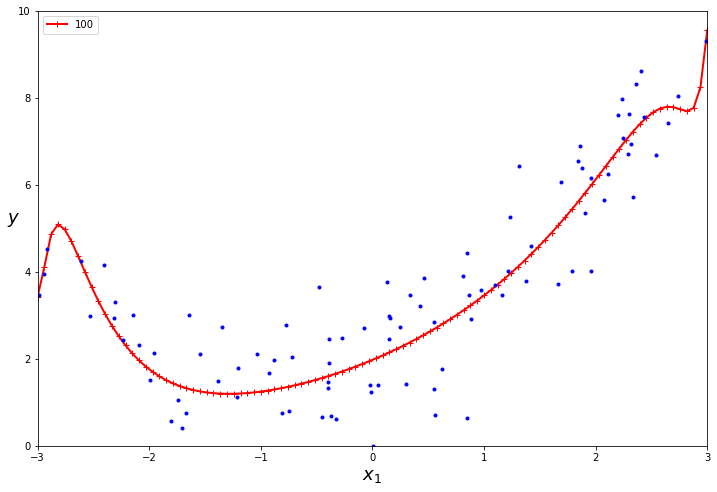

In [31]:
polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
ridge_reg = Ridge(alpha=1)

polynomial_regression = Pipeline([
    ('poly_features', polybig_features),
    ('std_scaler', std_scaler),
    ('ridge_reg', ridge_reg),
])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

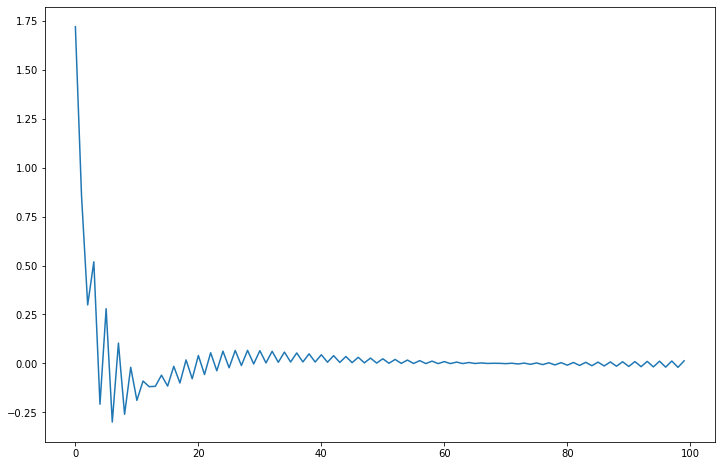

In [29]:
plt.plot(ridge_reg.coef_[0])

In [35]:
ridge_reg.coef_[0]

array([ 1.72050642e+00,  8.55863761e-01,  2.98708936e-01,  5.19020627e-01,
       -2.08736411e-01,  2.79278451e-01, -2.99830991e-01,  1.03657472e-01,
       -2.60161971e-01, -2.01482451e-02, -1.89151869e-01, -9.03422599e-02,
       -1.19119508e-01, -1.17276098e-01, -6.04070895e-02, -1.16155844e-01,
       -1.51799754e-02, -1.00223817e-01,  1.75794769e-02, -7.86715940e-02,
        3.99599043e-02, -5.69750438e-02,  5.41973544e-02, -3.79181508e-02,
        6.23001949e-02, -2.25742262e-02,  6.59304012e-02, -1.10394466e-02,
        6.63993978e-02, -2.91836132e-03,  6.47095286e-02,  2.38096504e-03,
        6.16086067e-02,  5.48149839e-03,  5.76431009e-02,  6.95374923e-03,
        5.32043833e-02,  7.28099961e-03,  4.85666366e-02,  6.85164775e-03,
        4.39168589e-02,  5.96535951e-03,  3.93780780e-02,  4.84520607e-03,
        3.50270279e-02,  3.65143821e-03,  3.09074469e-02,  2.49465660e-03,
        2.70399813e-02,  1.44737030e-03,  2.34294910e-02,  5.53622829e-04,
        2.00703881e-02, -

# Лассо регрессия (Least Absolute Shrinkage and Selection Operator Regression, Lasso regression, $L^1$ -регуляризация)

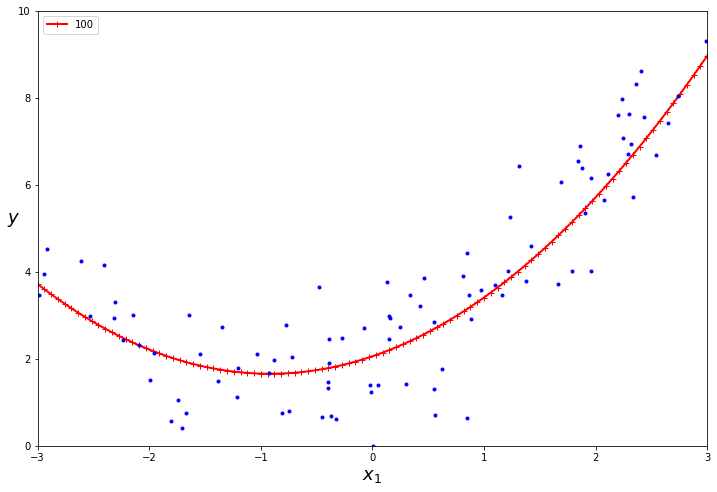

In [33]:
polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
lasso_reg = Lasso(alpha=0.2)

polynomial_regression = Pipeline([
    ('poly_features', polybig_features),
    ('std_scaler', std_scaler),
    ('lasso_reg', lasso_reg),
])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [38]:
lasso_reg.intercept_

array([3.38006699])

In [39]:
lasso_reg.coef_

array([ 1.39959487,  1.17566383,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# Elastic Net

Всегда следует делать регуляризацию. То есть следует избегать обычной линейной регресии. Если есть знание, что
часть признаков не важны, то используется Lasso или Elastic Net. Если признаки скоррелированы или количество признаков
больше количества примеров, то лучше использовать Elastic Net или Ridge.

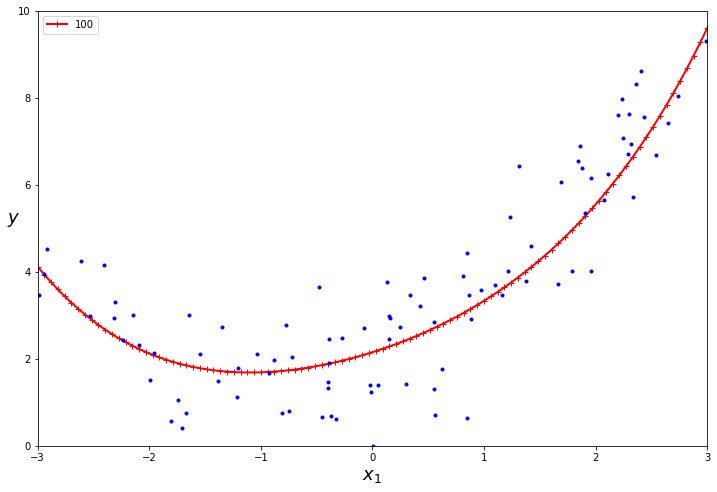

In [42]:
polybig_features = PolynomialFeatures(degree=100, include_bias=False)
std_scaler = StandardScaler()
elastic_reg = ElasticNet(alpha=0.2)

polynomial_regression = Pipeline([
    ('poly_features', polybig_features),
    ('std_scaler', std_scaler),
    ('elastic_reg', elastic_reg),
])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
    
plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [43]:
elastic_reg.coef_

array([ 1.29639903,  0.83705823,  0.09994432,  0.38039672,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.  

In [45]:
elastic_reg.intercept_

array([3.38006699])